In [6]:
from common import NWSL, Fonts, Images
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
year = 2021

In [12]:
df = pd.read_csv(f"nwsl_{str(year)}_trends.csv", index_col=0)
df

,2021-01-03,2021-01-10,2021-01-17,2021-01-24,2021-01-31,2021-02-07,2021-02-14,2021-02-21,2021-02-28,2021-03-07,...,2021-10-24,2021-10-31,2021-11-07,2021-11-14,2021-11-21,2021-11-28,2021-12-05,2021-12-12,2021-12-19,2021-12-26
Angel City FC,5,9,5,6,5,3,11,7,7,2,...,9,8,4,21,7,19,23,13,14,8
Chicago Red Stars,4,6,4,11,6,7,18,13,10,9,...,16,12,36,100,34,4,6,3,4,5
Houston Dash,6,4,8,1,2,2,1,2,5,4,...,4,7,2,0,5,2,3,0,4,2
Kansas City Current,2,9,4,3,2,6,4,5,6,5,...,27,17,2,0,3,0,1,0,0,0
North Carolina Courage,1,3,2,7,3,1,4,4,7,9,...,5,13,11,4,4,0,2,2,9,3
NJ/NY Gotham FC,4,6,0,0,0,3,3,3,3,2,...,21,19,16,0,4,6,15,5,6,4
OL Reign,1,2,5,4,5,1,6,4,5,4,...,13,15,10,41,10,0,6,15,10,4
Orlando Pride,3,4,2,2,5,2,9,11,13,9,...,22,8,0,6,4,7,7,1,0,4
Portland Thorns,5,7,10,7,4,8,8,16,3,5,...,16,27,21,51,11,11,11,8,12,4
Racing Louisville,2,7,3,2,1,0,3,3,0,3,...,11,8,2,3,2,3,5,4,4,3


In [13]:
# Sort by max value
df = df.reindex(df.max(1).sort_values(ascending=False).index)
df

,2021-01-03,2021-01-10,2021-01-17,2021-01-24,2021-01-31,2021-02-07,2021-02-14,2021-02-21,2021-02-28,2021-03-07,...,2021-10-24,2021-10-31,2021-11-07,2021-11-14,2021-11-21,2021-11-28,2021-12-05,2021-12-12,2021-12-19,2021-12-26
Chicago Red Stars,4,6,4,11,6,7,18,13,10,9,...,16,12,36,100,34,4,6,3,4,5
OL Reign,1,2,5,4,5,1,6,4,5,4,...,13,15,10,41,10,0,6,15,10,4
Portland Thorns,5,7,10,7,4,8,8,16,3,5,...,16,27,21,51,11,11,11,8,12,4
Washington Spirit,0,3,0,2,3,1,9,4,3,0,...,10,23,34,89,53,9,8,4,4,5
Orlando Pride,3,4,2,2,5,2,9,11,13,9,...,22,8,0,6,4,7,7,1,0,4
Angel City FC,5,9,5,6,5,3,11,7,7,2,...,9,8,4,21,7,19,23,13,14,8
North Carolina Courage,1,3,2,7,3,1,4,4,7,9,...,5,13,11,4,4,0,2,2,9,3
Kansas City Current,2,9,4,3,2,6,4,5,6,5,...,27,17,2,0,3,0,1,0,0,0
Racing Louisville,2,7,3,2,1,0,3,3,0,3,...,11,8,2,3,2,3,5,4,4,3
NJ/NY Gotham FC,4,6,0,0,0,3,3,3,3,2,...,21,19,16,0,4,6,15,5,6,4


<Figure size 504x864 with 0 Axes>

<Figure size 8400x14400 with 0 Axes>

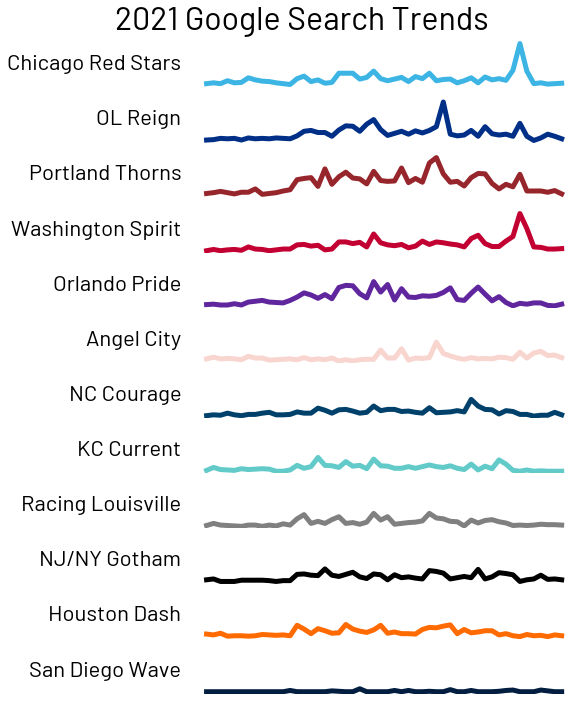

In [14]:
# Subplots configuration
plt.clf()
plt.rcParams["figure.figsize"] = (7, 12)
plt.figure(dpi=1200, facecolor="white")
fig, axs = plt.subplots(len(df.index), 1)
fig.patch.set_facecolor("white")

for i, team in enumerate(df.index):
    ax = axs[i]

    # Plot values
    ax.plot(
        df.columns,
        df.iloc[i],
        linewidth=5,
        color=NWSL.color(team),
    )

    # Adjust scale and remove axes
    ax.set_ylim([-5, 105])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    # Add the team name
    ax.set_ylabel(
        NWSL.name(team),
        fontproperties=Fonts.BARLOW,
        size=22,
        rotation=0,
        ha="right",
        va="center",
    )

plt.suptitle(
    f"{year} Google Search Trends", fontproperties=Fonts.BARLOW, size=32, x=0.35, y=0.92
)

# Save image
plt.savefig(
    f"nwsl_{year}_trends.png",
    bbox_inches="tight",
    pad_inches=0.5,
)